<a href="https://colab.research.google.com/github/ernestoruizds/DS_C3_SC1_ERNESTO_RUIZ_SANCHEZ/blob/main/DS_C3_SC1_ERNESTO_RUIZ_SANCHEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exactitud del modelo Red Neuronal con 2 capas con 5 y 10 neuronas: 0.8177777777777778

Matriz de confusión Red Neuronal de 2 capas con 5 y 10 neuronas


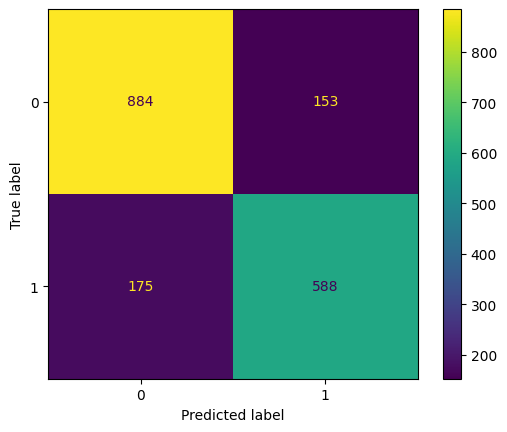

In [25]:
#1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
#2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
#3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_ERNESTO_RUIZ.ipynb.
#4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab            import drive
from sklearn.preprocessing   import LabelEncoder, OneHotEncoder #, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.neural_network  import MLPClassifier

drive.mount('/content/drive', force_remount=True)

data = pd.read_csv("/content/drive/MyDrive/M17/Reto/bank_marketing_RETO_DS_AS.csv")

# 5.	Obtener la información de dicha base de datos que incluya el número de registros,
#     el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

data.head()
data.info()

# 6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.

# Analizamos los distintos valores de cada variable categórica
data['job'].value_counts()       # Contiene 12 clases distintas
data['marital'].value_counts()   # Contiene 3 clases distintas
data['education'].value_counts() # Contiene 4 clases distintas
data['default'].value_counts()   # Contiene 2 clases distintas (binaria)
data['housing'].value_counts()   # Contiene 2 clases distintas (binaria)
data['loan'].value_counts()      # Contiene 2 clases distintas (binaria)
data['contact'].value_counts()   # Contiene 3 clases distintas
data['month'].value_counts()     # Contiene 12 clases distintas
data['poutcome'].value_counts()  # Contiene 4 clases distintas

# Para variables categóricas con 4 categorías o menos, utilizamos el método de One-Hot
# porque las Redes Neuronales interpretan más fácilmente las salidas One-Hot que directamente los enteros.
# Sin embargo, pueden volverse imprácticos con variables que tienen muchos valores distintos
# porque se crea una columna por cada valor en la variable

# Inicializando OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Aplicamos one-hot encoding a las columnas con pocos valores distintintos y se crea un DataFrame con esas columnas ya transformadas
one_hot_encoded  = encoder.fit_transform(data[['marital','education','default','housing','loan','poutcome','contact']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(['marital','education','default','housing','loan','poutcome','contact']))

# Se concatena el dataframe de one-hot encoded con el dataframe original. Este nuevo dataframe se llamará df_encoded
data = pd.concat([data, one_hot_df], axis=1)

# Luego quitamos las columnas que fueron transformadas porque no aportan valor al análisis
data = data.drop(['marital','education','default','housing','loan','poutcome','contact'],axis=1)

# Para variables con 4 o más de categorías, utilizamos el método de LabelEncoder; así como para la variable de salida "y"
le = LabelEncoder()
cols=['job', 'month', 'y']

data[cols] = data[cols].apply(LabelEncoder().fit_transform)

# 7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

# Revisamos las características de las variables numéricas (age, balance, day, duration, campaign, pdays, previous)
data['age'].describe() # Min=18, Max=99
data['age'].value_counts()

data['balance'].describe() # Min=-3058; Max=81204
data['balance'].value_counts()

data['day'].describe() # Min=1 , Max=31
data['day'].value_counts()

data['duration'].describe() # Min=3, Max=3253
data['duration'].value_counts()

data['campaign'].describe() # Min=1 , Max=58
data['campaign'].value_counts()

data['pdays'].describe() # Min= -1, Max= 850
data['pdays'].value_counts()

data['previous'].describe() # Min=0, Max=58
data['previous'].value_counts()

# Como podemos ver, las variables "balance" tiene valores muy grandes y pequeños incluyendo el cero
# De igual modo, vemos que la variable "pdays" tiene valores -1 y valores positivos relativamente alejados del -1
# Las variables "age", "day", "duration", "campaign" y "previous" tienen valores positivos pero necesitamos ver su distribución

# Ahora graficamos las variables para ver si tienen algún sesgo en su distribución
fig, axs = plt.subplots(2,4, figsize=(10,7))

age      = np.array(data['age'])
balance  = np.array(data['balance'])
day      = np.array(data['day'])
duration = np.array(data['duration'])
campaign = np.array(data['campaign'])
pdays    = np.array(data['pdays'])
previous = np.array(data['previous'])

axs[0,0].hist(age, bins=40)
axs[0,0].set_xlabel('Age')

axs[0,1].hist(balance, bins=20)
axs[0,1].set_xlabel('Balance')

axs[0,2].hist(day, bins=40)
axs[0,2].set_xlabel('Day')

axs[0,3].hist(duration, bins=40)
axs[0,3].set_xlabel('Duration')

axs[1,0].hist(campaign, bins=20)
axs[1,0].set_xlabel('campaign')

axs[1,1].hist(pdays, bins=40)
axs[1,1].set_xlabel('pDays')

axs[1,2].hist(previous, bins=40)
axs[1,2].set_xlabel('Previous')

plt.show()

# Se oberva que las varibles "age", "day", "duration" y "campaign" tienen un marcado sesgo positivo (a la derecha)
# así que se les aplicará una transformación logarítmica
# También se puede ver que la variable "day" no muestra una distribución de campana
# La variable "balance" tiene valores muy grandes y pequeños, incluyendo el cero
# Hay que considerar que la variable "pdays" tiene valores negativos
# y la variale "previous" tiene muchos datos con valor 0

# Dado que la variable balance tiene valores muy grandes y pequeños, incluyendo el cero
# Se opta por Escalar de manera Standard
data['balance'] = (data['balance'] - data['balance'].mean()) / data['balance'].std()
Tbalance        = np.array(data['balance'])

# Dado que pDays tiene valores negativos, se opta pusar el método de min - max para transformar los datos
data['pdays'] = (data['pdays'] - min(data['pdays'])) / (max(data['pdays']) - min(data['pdays']))
Tdays         = np.array(data['pdays'])

# Dado que "previous" tiene muchos datos con valor 0,se decide escalar con estandarización
data['previous'] = (data['previous'] - data['previous'].mean()) / data['previous'].std()
Tprevious        = np.array(data['previous'])

data['age'] = np.log(data['age'])
Tage        = np.array(data['age'])

data['day'] = np.log(data['day'])
Tday        = np.array(data['day'])

data['duration'] = np.log(data['duration'])
Tduration        = np.array(data['duration'])

data['campaign'] = np.log(data['campaign'])
Tcampaign        = np.array(data['campaign'])

# Ahora revisamos cómo se distribuyeron después de haber sido transfromadas
fig, axs2 = plt.subplots(2,4, figsize=(10,7))

axs2[0,0].hist(Tage, bins=40)
axs2[0,0].set_xlabel('Age Transformed')

axs2[0,1].hist(Tbalance, bins=20)
axs2[0,1].set_xlabel('Balance Transformed')

axs2[0,2].hist(Tday, bins=40)
axs2[0,2].set_xlabel('Day Transformed')

axs2[0,3].hist(Tduration, bins=40)
axs2[0,3].set_xlabel('Duration Transformed')

axs2[1,0].hist(Tcampaign, bins=20)
axs2[1,0].set_xlabel('Campaign Transformed')

axs2[1,1].hist(Tdays, bins=40)
axs2[1,1].set_xlabel('pDays Transformed')

axs2[1,2].hist(Tprevious, bins=40)
axs2[1,2].set_xlabel('Previous Transformed')

# 8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
# 9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.
X = data[['age','job','balance','day','month','duration','campaign','pdays','previous','marital_divorced','marital_married','marital_single','education_primary','education_secondary','education_tertiary','education_unknown','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown','contact_cellular','contact_telephone','contact_unknown']]
Y = data[['y']]

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=.60)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=.50)

# 10a.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento.
clf = LogisticRegression(C= 1.0, solver ='newton-cg', max_iter=1000)
MRL = clf.fit(X_train, Y_train)

# 10b. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión.
print("Exactitud Modelo de Regresión Logística = ", MRL.score(X_val, Y_val))
print("")

print("Iniciando pruebas con diferentes valores de parámetro C")
print("-----------------------------------------------------------------------")
from sklearn.metrics import ConfusionMatrixDisplay

Conf_Mtrx_01 = ConfusionMatrixDisplay.from_estimator(MRL, X_test, Y_test)

# 10c. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.
# Se usarán diferentes valores de C (desde 0.25 hasta 2 en incrementos de 0.25)
Ci = [i for i in range(25, 225, 25)]
train_scores, val_scores = list(), list()
train_errors, val_errors = list(), list()

for i in Ci:
  mod_clf = LogisticRegression(C= (i/100.0), solver ='newton-cg', max_iter=1000)

  mod_clf.fit(X_train, np.ravel(Y_train))

  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = mod_clf.predict(X_train)
  train_loss =  sum(abs(np.ravel(Y_train) - train_yhat)) / Y_train.shape[0]
  train_errors.append(train_loss)
  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  # Predicciones y métricas con el conjunto de validación:
  val_yhat = mod_clf.predict(X_val)
  val_loss = sum(abs(np.ravel(Y_val) - val_yhat)) / Y_val.shape[0]
  val_errors.append(val_loss)
  val_acc = 1 - val_loss
  val_scores.append(val_acc)

  # Mostramos el resultado de las métricas en cada iteración
  print('C = %.2f => trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f'
        % (i/100, train_acc, val_acc, train_loss, val_loss))

# Generamos la gráfica de la exactitud para predecir, usando los datos de entrenamiento y de validación
fig, axs = plt.subplots()
plt.plot(Ci, train_scores, '-o', label='Train')
plt.plot(Ci, val_scores, '-o', label='Val')
plt.title("C vs Exactitud")
plt.xlabel("C")
plt.ylabel("Exactitud")
plt.legend()

fig, axse = plt.subplots()
plt.plot(Ci, train_errors, '-o', label='Train')
plt.plot(Ci, val_errors, '-o', label='Val')
plt.title("C vs Errores")
plt.xlabel("C")
plt.ylabel("Errores")
plt.legend()

# Para esta corrida, el mejor pronóstico fue con un C=0.5
# Se ajusta el parámetro C a 0.5
clf2 = LogisticRegression(C= 0.5, solver ='newton-cg', max_iter=1000)
MRL2 = clf2.fit(X_train, Y_train)

print("Exactitud del Modelo de Regresión Logística después de ajustar parámetros = ", MRL2.score(X_val, Y_val))
print("-----------------------------------------------------------------------")

print("Matriz de confusión de Regresión Logística después de ajustar parámetros")
Conf_Mtrx_02 = ConfusionMatrixDisplay.from_estimator(MRL2, X_test, Y_test)

# 11a.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento.
print("Iniciando análisis usando Redes Neuronales...")
print("-----------------------------------------------------------------------")
print("Primer modelo con 1 capa de 5 neuronas")

model = MLPClassifier(hidden_layer_sizes = (5),
                      max_iter=1000,
                      learning_rate_init=0.001)

model.fit(X_train, np.ravel(Y_train))

train_yhat = model.predict(X_train)
train_loss =  sum(abs(np.ravel(Y_train) - train_yhat)) / Y_train.shape[0]
train_errors.append(train_loss)
train_acc = 1 - train_loss
train_scores.append(train_acc)

# Predicciones y métricas con el conjunto de validación:
val_yhat = model.predict(X_val)
val_loss = sum(abs(np.ravel(Y_val) - val_yhat)) / Y_val.shape[0]
val_errors.append(val_loss)
val_acc = 1 - val_loss
val_scores.append(val_acc)

# 11b. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión.
print('Exactitud del modelo Red Neuronal con 1 capa de 5 neuronas:', model.score(X_test, Y_test))

print("Matriz de confusión Red Neuronal de 1 capa con 5 neuronas")
Conf_Mtrx_RN01 = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

print( "-----------------------------------------------------------------------")
print("Analizando modelos con 1 o 2 capas y diferente cantidad de neuronas por capa")
print("------------------------------------------------------------------------")

# 11c. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.
train_scores, val_scores = list(), list()
train_errors, val_errors = list(), list()

# Inicializamos variables para armado de combinaciones de capas y neuronas por capa
wl = list()
lst = list()
i = 1
# Inicio de armado de combinaciones
# El resultado será 1 capa con 5 neuronas, otra capa con 10 neuronas y 2 capas con 5 y 10 neuronas
for c in range(1, 3, 1):
    for n in range(5, 11, 5):
        if (i < c ):
            wl.append(n)
            i = i + 1
        else:
            wl.append(n)
            lst.append(wl)
            wl = []
            i = 1

for i in lst:
  model = MLPClassifier(hidden_layer_sizes = (i),
                        max_iter=1000,
                        learning_rate_init=0.001)

  model.fit(X_train, np.ravel(Y_train))

  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(X_train)
  train_loss =  sum(abs(np.ravel(Y_train) - train_yhat)) / Y_train.shape[0]
  train_errors.append(train_loss)
  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  # Predicciones y métricas con el conjunto de validación:
  val_yhat = model.predict(X_val)
  val_loss = sum(abs(np.ravel(Y_val) - val_yhat)) / Y_val.shape[0]
  val_errors.append(val_loss)
  val_acc = 1 - val_loss
  val_scores.append(val_acc)

  # Mostramos el resultado de las métricas en cada iteración
  print(i, '> trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f'
        % (train_acc, val_acc, train_loss, val_loss))

fig, axs = plt.subplots()
plt.plot([5,10,15], train_scores, '-o', label='Train')
plt.plot([5,10,15], val_scores, '-o', label='Val')

plt.legend()

plt.title('Neuronas vs Exactitud')
plt.xlabel('Neuronas en modelo MLP')
plt.ylabel('Exactitud')
plt.show()

plt.plot([50,100,150], train_errors, '-o', label='Train')
plt.plot([50,100,150], val_errors, '-o', label='Val')
plt.legend()

plt.title('Neuronas vs Error')
plt.xlabel('Neuronas en modelo MLP')
plt.ylabel('Error')
plt.show()

# El mejor valor obtenido fue con 1 capa con 10 neuronas
model = MLPClassifier(hidden_layer_sizes = (10),
                      max_iter=1000,
                      learning_rate_init=0.001)

model.fit(X_train, np.ravel(Y_train))

train_yhat = model.predict(X_train)
train_loss =  sum(abs(np.ravel(Y_train) - train_yhat)) / Y_train.shape[0]
train_errors.append(train_loss)
train_acc = 1 - train_loss
train_scores.append(train_acc)

# Predicciones y métricas con el conjunto de validación:
val_yhat = model.predict(X_val)
val_loss = sum(abs(np.ravel(Y_val) - val_yhat)) / Y_val.shape[0]
val_errors.append(val_loss)
val_acc = 1 - val_loss
val_scores.append(val_acc)

# 12.	Selecciona el mejor modelo encontrado en los incisos anteriores
# y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.
print('Exactitud del modelo Red Neuronal con 2 capas con 5 y 10 neuronas:', model.score(X_test, Y_test))
print()
print("Matriz de confusión Red Neuronal de 2 capas con 5 y 10 neuronas")
Conf_Mtrx_RN02 = ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)
